In [47]:
%pip install ipydatagrid

Note: you may need to restart the kernel to use updated packages.


In [48]:
%pip install aplpy

Note: you may need to restart the kernel to use updated packages.


# 1) AstroPy

In [49]:
from astropy.io import fits

In [50]:
!ls 

ALMA-OrionKL-band6-cont.fits	       AstroPython.ipynb    emsii6731_flux.fits
ALMA-OrionKL-band6-methanol.fits       emhbeta_flux.fits    view.fits
ALMA-OrionKL-band6-methanon-mom0.fits  emnii6584_flux.fits


In [51]:
hdulist = fits.open("ALMA-OrionKL-band6-cont.fits")
hdulist

In [52]:
hdu = hdulist[0]
help(hdu)

Help on PrimaryHDU in module astropy.io.fits.hdu.image object:

class PrimaryHDU(_ImageBaseHDU)
 |  PrimaryHDU(data=None, header=None, do_not_scale_image_data=False, ignore_blank=False, uint=True, scale_back=None)
 |  
 |  FITS primary HDU class.
 |  
 |  Method resolution order:
 |      PrimaryHDU
 |      _ImageBaseHDU
 |      astropy.io.fits.hdu.base._ValidHDU
 |      astropy.io.fits.hdu.base._BaseHDU
 |      astropy.io.fits.verify._Verify
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, header=None, do_not_scale_image_data=False, ignore_blank=False, uint=True, scale_back=None)
 |      Construct a primary HDU.
 |      
 |      Parameters
 |      ----------
 |      data : array or ``astropy.io.fits.hdu.base.DELAYED``, optional
 |          The data in the HDU.
 |      
 |      header : `~astropy.io.fits.Header`, optional
 |          The header to be used (as a template).  If ``header`` is `None`, a
 |          minimal header will be provided.
 |

In [53]:
hdu.data

array([[ 0.03462455,  0.03394877,  0.0348247 , ...,  0.00512782,
         0.01290684,  0.02093568],
       [ 0.04125445,  0.03483354,  0.03083117, ...,  0.00361592,
         0.01317338,  0.02610629],
       [ 0.04762579,  0.0362675 ,  0.02696897, ..., -0.00290151,
         0.01028361,  0.02754407],
       ...,
       [-0.00706197, -0.00413066, -0.00275087, ..., -0.02907074,
        -0.00520752,  0.01757605],
       [-0.00493182, -0.00635676, -0.00597036, ..., -0.02548184,
        -0.00696347,  0.01069312],
       [ 0.00124471, -0.00786869, -0.01027288, ..., -0.01701476,
        -0.00597558,  0.00344427]], dtype='>f4')

In [54]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 51.0 / Pixel coordinate of reference point            
CRPIX2  =                 51.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0001111111111111 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0001111111111111 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---SIN'        

In [55]:
from astropy.wcs import WCS
wcs = WCS(hdu.header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN' 'DEC--SIN' 
CRVAL : 83.80979166667 -5.376388888889 
CRPIX : 51.0 51.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0001111111111111 0.0001111111111111 
NAXIS : 100  100

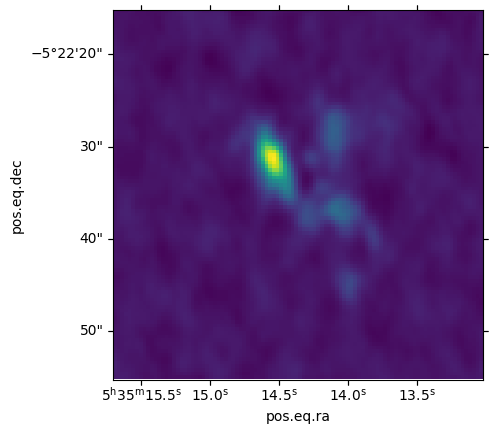

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(projection=wcs)
plt.imshow(hdu.data)

In [57]:
help(wcs)

Help on WCS in module astropy.wcs.wcs object:

class WCS(astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin, astropy.wcs.WCSBase)
 |  WCS(header=None, fobj=None, key=' ', minerr=0.0, relax=True, naxis=None, keysel=None, colsel=None, fix=True, translate_units='', _do_set=True)
 |  
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  See also: https://docs.astropy.org/en/stable/wcs/
 |  
 |  Parameters
 |  ----------
 |  header : `~astropy.io.fits.Header`, `~astropy.io.fits.hdu.image.PrimaryHDU`, `~astropy.io.fits.hdu.image.ImageHDU`, str, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : `~astropy.io.fits.HDUList`, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a diffe

In [58]:
resol  = wcs.wcs.cdelt
center = wcs.wcs.crval
lpoints = [center, center + 2*resol, center -5*resol]
lpoints

[array([83.80979167, -5.37638889]),
 array([83.80956944, -5.37616667]),
 array([83.81034722, -5.37694444])]

In [59]:
import astropy.units as u
import numpy as np
diff = lpoints[0] - lpoints[2]
dist = np.sqrt(diff[0]**2 + diff[1]**2)* u.deg
dist.to("arcsec")

<Quantity 2.82842712 arcsec>

In [60]:
lpix = wcs.all_world2pix(lpoints,0)
lpix

array([[50.        , 50.        ],
       [51.99120205, 51.99999964],
       [45.02200124, 44.99999774]])

In [61]:
lpix_int=lpix.astype("int")
print(lpix_int)
for pix in lpix_int:
    print(hdu.data[pix[0],pix[1]])

[[50 50]
 [51 51]
 [45 44]]
0.11014378
0.005105594
0.00022762083


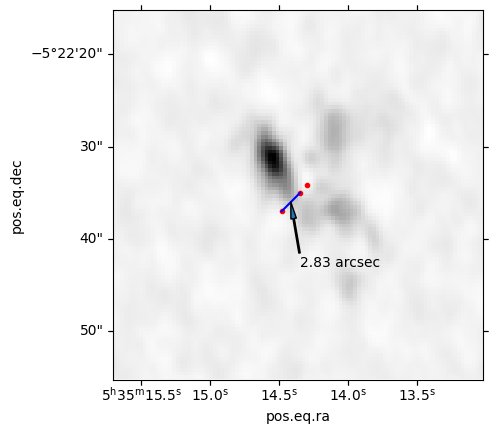

In [62]:
plt.subplot(projection=wcs)
plt.imshow(hdu.data,cmap="gray_r")
plt.scatter(lpix[:,0],lpix[:,1],c='red',marker='.')
ini = lpix[0]
end = lpix[2]
plt.plot([ini[0],end[0]],[ini[1],end[1]],c="blue")
dist = np.around(dist.to("arcsec"),decimals=2)
plt.annotate(dist, xy=(ini+end)/2, xytext=(50, 30),
           arrowprops=dict(headwidth=4,width=1))
plt.show()

In [63]:
!ls

ALMA-OrionKL-band6-cont.fits	       AstroPython.ipynb    emsii6731_flux.fits
ALMA-OrionKL-band6-methanol.fits       emhbeta_flux.fits    view.fits
ALMA-OrionKL-band6-methanon-mom0.fits  emnii6584_flux.fits


In [64]:
# http://muse-vlt.eu/science/m42/

In [65]:
H = fits.open("emhbeta_flux.fits")[0]
N = fits.open("emnii6584_flux.fits")[0]
S = fits.open("emsii6731_flux.fits")[0]
wcs = WCS(H.header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : '' '' 
CRVAL : 0.0 0.0 
CRPIX : 0.0 0.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 1.0 1.0 
NAXIS : 1766  1476

In [66]:
def stand(A):
    A=np.power(A,1/3)
    A=A-A.min()
    A=A/A.max()
    return(A)

nH =stand(H.data)
nN =stand(N.data)
nS =stand(S.data)

(np.float64(-0.5), np.float64(1765.5), np.float64(1475.5), np.float64(-0.5))

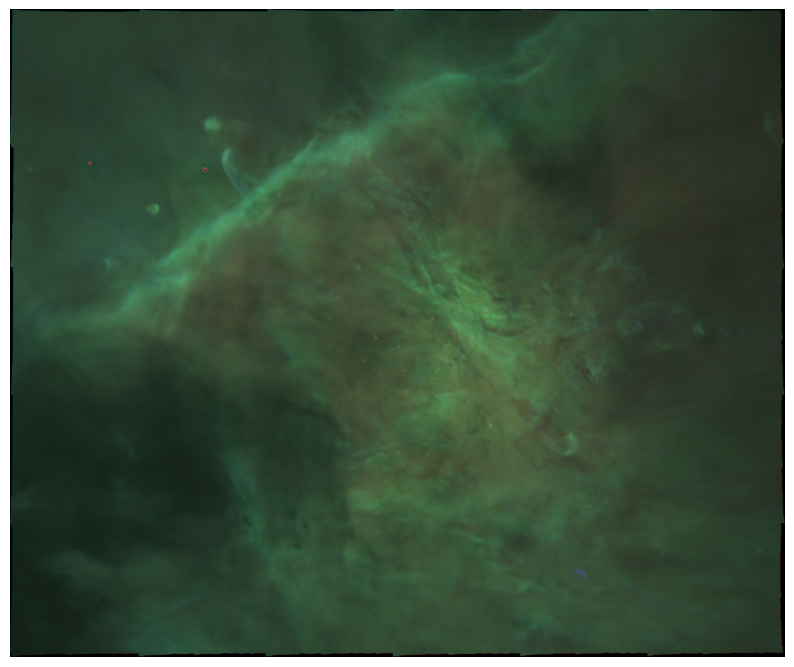

In [67]:
plt.figure(figsize=(10,10))
rgbimg = np.array([nH.T,nN.T,nS.T]).T
plt.imshow(rgbimg)
plt.axis('off')

In [68]:
Orion3D = fits.open("ALMA-OrionKL-band6-methanol.fits")[0]

In [69]:
import warnings
warnings.simplefilter('ignore', Warning)

In [70]:
wcs = WCS(Orion3D.header)
wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN' 'DEC--SIN' 'FREQ' 'STOKES' 
CRVAL : 83.80979166667 -5.376388888889 229763161321.4 1.0 
CRPIX : 51.0 51.0 1.0 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0 0.0 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0 1.0 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0 0.0 0.0 1.0 
CDELT : -0.0001111111111111 0.0001111111111111 -488336.1207886 1.0 
NAXIS : 100  100  41  1

In [71]:
my_data = Orion3D.data[0]
my_data.shape

(41, 100, 100)

In [72]:
my_wcs = wcs.dropaxis(3)
my_wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN' 'DEC--SIN' 'FREQ' 
CRVAL : 83.80979166667 -5.376388888889 229763161321.4 
CRPIX : 51.0 51.0 1.0 
PC1_1 PC1_2 PC1_3  : 1.0 0.0 0.0 
PC2_1 PC2_2 PC2_3  : 0.0 1.0 0.0 
PC3_1 PC3_2 PC3_3  : 0.0 0.0 1.0 
CDELT : -0.0001111111111111 0.0001111111111111 -488336.1207886 
NAXIS : 100  100  41

In [73]:
vmax = my_data.max()
vmin = my_data.min()

def func(i):
    plt.subplot(projection=my_wcs.dropaxis(2))
    plt.imshow(my_data[i],cmap="seismic",vmax=vmax,vmin=vmin)
    plt.colorbar()

interactive(children=(IntSlider(value=20, description='i', max=40), Output()), _dom_classes=('widget-interact'…

<function __main__.func(i)>

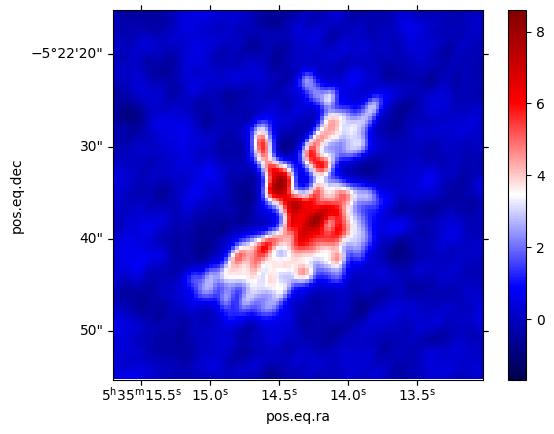

In [74]:
from ipywidgets import interact
interact(func,i=(0,40,1))

# 2) AplPy
``conda install -c astropy aplpy``

INFO: Auto-setting vmin to -1.115e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.030e+01 [aplpy.core]


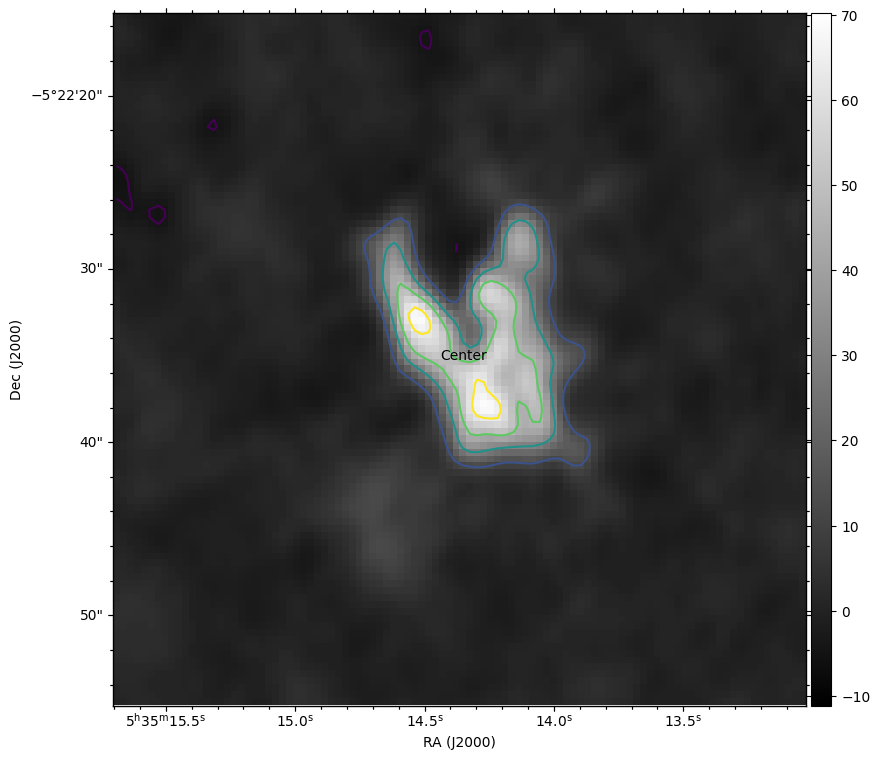

In [75]:
import aplpy
imgi = fits.open("ALMA-OrionKL-band6-methanon-mom0.fits")[0]
fig = aplpy.FITSFigure(imgi)
fig.show_grayscale()
# fig.show_grid()
fig.show_contour()
fig.add_colorbar()
fig.add_label(imgi.header['CRVAL1'],imgi.header['CRVAL2'],"Center")

# 3) Astroquery

``conda install -c astropy astroquery``

In [76]:
import astroquery

In [77]:
from astroquery.skyview import SkyView
dd=SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [78]:
# res=SkyView.get_image_list('Orion',['SDSSg'])
res=SkyView().get_image_list(position='Eta Carinae', survey=['Fermi 5', 'HRI', 'DSS'])
print(res)

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv1178711324218_1.fits', 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv1178711324218_2.fits', 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv1178711324218_3.fits']


In [79]:
import urllib.request
urllib.request.urlretrieve(res[0],'view.fits')

('view.fits', <http.client.HTTPMessage at 0x7fd5f036c490>)

In [80]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 51.0 / Pixel coordinate of reference point            
CRPIX2  =                 51.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0001111111111111 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0001111111111111 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---SIN'        

In [81]:
side = 0.0001111111111111*51

INFO: Auto-setting vmin to -4.776e-09 [aplpy.core]
INFO: Auto-setting vmax to  5.301e-08 [aplpy.core]


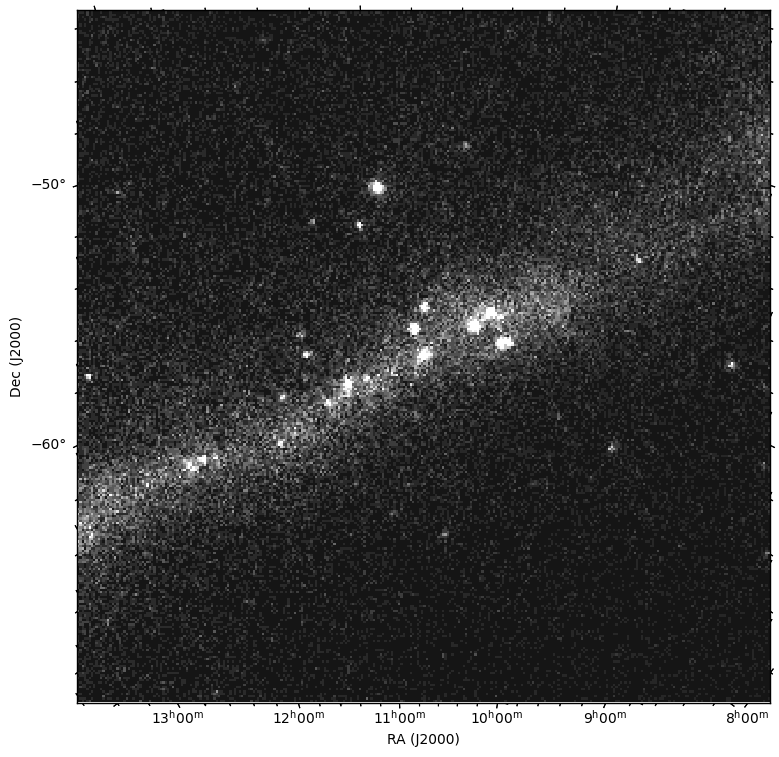

In [82]:
hdulist = fits.open("view.fits")
view = hdulist[0] 
fig = aplpy.FITSFigure(view)
fig.show_grayscale()
fig.show_markers(center[0],center[1])
fig.show_rectangles(center[0],center[1],width=side,height=side,edgecolor="blue")

In [83]:
#from astroquery.vizier import Vizier
from astroquery.simbad import Simbad

In [84]:
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=center[0]*u.deg, dec=center[1]*u.deg)
tab = Simbad.query_region(c, radius=side/2.0*u.deg)
tab.show_in_notebook()

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_renderer=None, default_render…

INFO: Auto-setting vmin to -5.699e-09 [aplpy.core]
INFO: Auto-setting vmax to  6.326e-08 [aplpy.core]


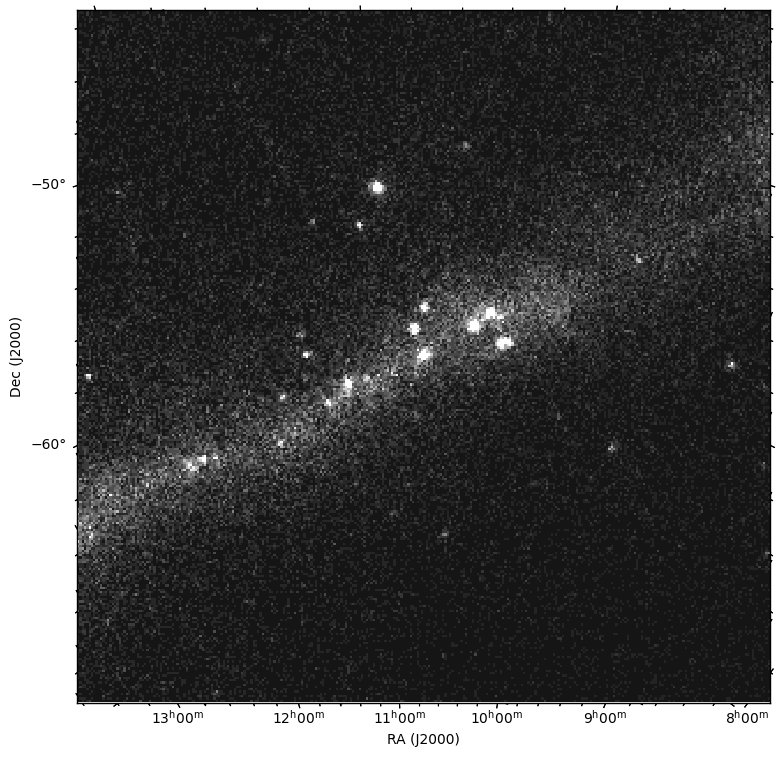

In [85]:
%matplotlib inline
from astropy.coordinates import Angle
fig = aplpy.FITSFigure(view)
fig.show_grayscale()
fig.show_markers(center[0],center[1],c="cyan")
fig.show_rectangles(center[0],center[1],width=side,height=side,edgecolor="blue")
ra_list=[]
dec_list=[]
for row in tab:
    p = SkyCoord(row['RA'],row['DEC'], unit=(u.hourangle, u.deg))
    ra_list.append(p.ra.value)
    dec_list.append(p.dec.value)
fig.show_markers(ra_list,dec_list)